In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as p

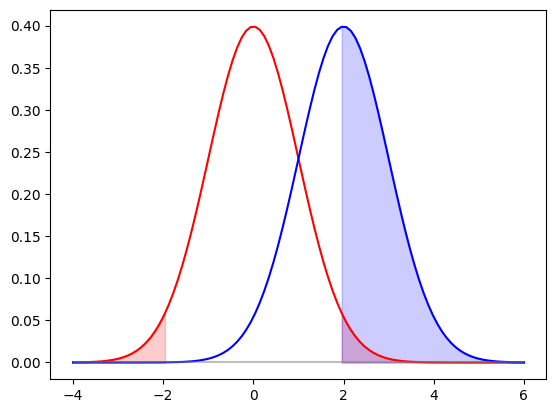

In [50]:
# define distribution params and x range
mu1 = 0
mu2 = 2
s1 = 1
s2 = 1
alpha = 0.05
x = np.linspace(mu1 - 4*s1, mu2 + 4*s1, 100)
# find critical values for given alpha
alpha = 0.05
crit = stats.norm.ppf(1-alpha/2, mu1, s1)
plt.plot(x, stats.norm.pdf(x,mu1,s1), color='red')
plt.plot(x, stats.norm.pdf(x,mu2,s2), color='blue')
plt.hlines(y=0,xmin=min(x), xmax=max(x),color='grey',alpha=0.5)
#plt.vlines(crit,ymin=0, ymax=stats.norm.pdf(crit,mu1,s1), color='cyan', linestyle = '-')
# fill areas
x1 = np.linspace(min(x),-crit,100)
x2 = np.linspace(crit,max(x),100)
y1 = stats.norm.pdf(x1,mu1,s1)
y2 = stats.norm.pdf(x2,mu1,s1)
plt.fill_between(x1, y1, color='red',alpha=0.2)
plt.fill_between(x2, y2, color='red',alpha=0.2)
y3 = stats.norm.pdf(x2,mu2,s2)
plt.fill_between(x2,y3, color='blue',alpha=0.2)

In [59]:
# write the function for plotting
def plot_power(mu,s,alpha,x_scale = None):
    #mu is a vector of length 2, defining means of two distributions
    #s is a vector of length 2, defining standard dev of two distributions
    #alpha is the type 1 error under consideration
    #x_scale is a vector of length 2, defining min max range for x_axis limits
    mu1, mu2 = mu[0], mu[1]
    s1, s2 = s[0], s[1]
    gnrl = 200 #granularity param for plotting
    if x_scale is None:
        x = np.linspace(mu1 - 4*s1, mu2 + 4*s1, gnrl)
    else:
        x = np.linspace(x_scale[0],x_scale[1], gnrl)
    # find critical values for given alpha
    alpha = 0.05
    crit = stats.norm.ppf(1-alpha/2, mu1, s1)
    plt.plot(x, stats.norm.pdf(x,mu1,s1), color='red')
    plt.plot(x, stats.norm.pdf(x,mu2,s2), color='blue')
    plt.hlines(y=0,xmin=min(x), xmax=max(x),color='grey',alpha=0.5)
    #plt.vlines(crit,ymin=0, ymax=stats.norm.pdf(crit,mu1,s1), color='cyan', linestyle = '-')
    # fill areas
    x1 = np.linspace(min(x),-crit,gnrl)
    x2 = np.linspace(crit,max(x),gnrl)
    y1 = stats.norm.pdf(x1,mu1,s1)
    y2 = stats.norm.pdf(x2,mu1,s1)
    plt.fill_between(x1, y1, color='red',alpha=0.2)
    plt.fill_between(x2, y2, color='red',alpha=0.2)
    y3 = stats.norm.pdf(x2,mu2,s2)
    plt.fill_between(x2,y3, color='blue',alpha=0.2)
    #power calculation
    power = 1-stats.norm.cdf(crit,mu2,s2)
    print("Power of this test is {0}.".format(power))

Power of this test is 0.979326630641108.


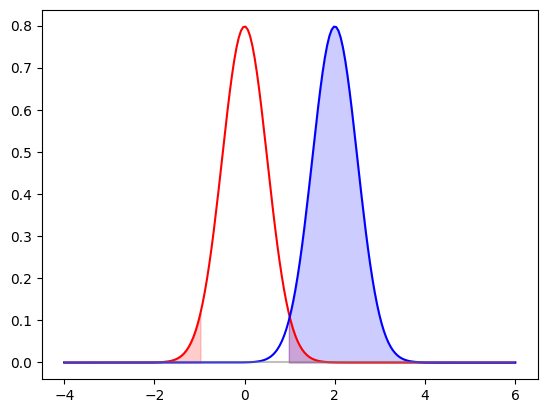

In [62]:
plot_power([0,2],[0.5,0.5],0.05,[-4,6])
plt.savefig('low_variance.png')

Power of this test is 0.5159677934423318.


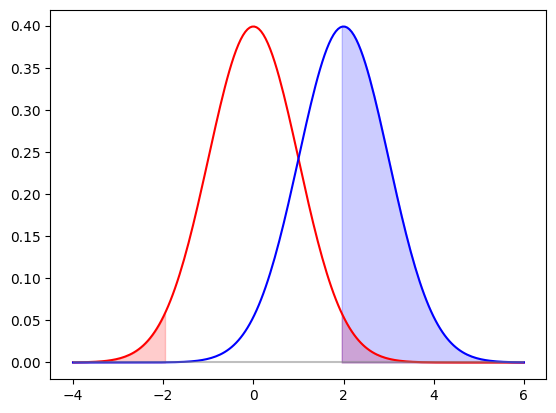

In [63]:
plot_power([0,2],[1,1],0.05,[-4,6])
plt.savefig('high_variance.png')